In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [32]:

# Voltage divider #1

R1 = 100 # ohms unless otherwise stated
R2 = 20E3
C1 = 680E-12 # farads

# Voltage divider #2

R3 = 47E3 # ohms unless otherwise stated
C2 = 0.22E-6 # farads

# Voltage divider #3

R4 = 200 # ohms unless otherwise stated
R5 = 2E3
C3 = 1E-9 # farads

j = 0 + 1j

def gain50(frequency):
    omega = 2 * np.pi * frequency
    amp1 = ((1 / (1 / R2 + (j * omega * C1))) + R1) / R1
    amp2 = ((j * omega * C2) + R3) / R3
    amp3 = ((1 / (1 / R5 + (j * omega * C3))) + R4) / R4
    return ((amp1 * amp3) / amp2)

print(gain50(400))

(2208.038784398054-85.19908719638104j)


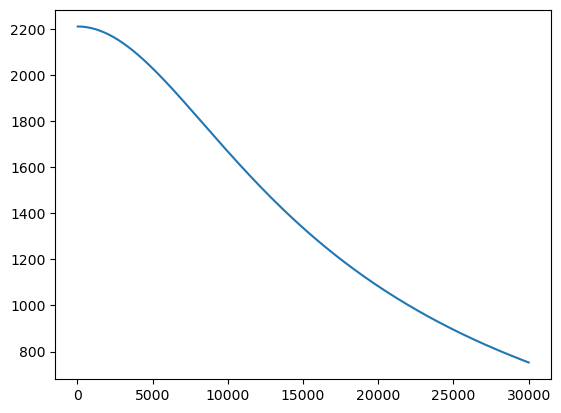

In [35]:
frequency_domain = np.linspace(25, 30000, 300)
fig, ax = plt.subplots()
ax.plot(frequency_domain, np.abs(gain50(frequency_domain)))